In [1]:
from sklearn import datasets
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('C:/Users/Isabela Duque/Desktop/Ingeniería Biomédica ITM/SEMESTRE 6°/Automatización II/Laboratorio #1/alzheimers_data.csv')

ANÁLISIS PRELIMINAR DEL PROBLEMA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

(a). 
Tipo de problema: Clasificación - Target: Diagnosis (0=Sin Alzheimer, 1=Alzheimer); Diagnosis toma solo dos 
valores {0, 1}. Eso es una etiqueta categórica (presencia/ausencia de Alzheimer), no un valor continuo, por lo tanto, 
⇒ es clasificación binaria

(b).    
variables = 
Numericas: "Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality","SystolicBP", 
 "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", 
 "FunctionalAssessment", "ADL"
    
 Categoricas: "Ethnicity", "EducationLevel", "DoctorInCharge" ----- # DoctorInCharge no es útil, todos los valores 
 aparecen como "XXXConfid", Eso significa que los nombres de los médicos fueron anonimizados para proteger la 
 confidencialidad. Por lo tanto, no aporta información clínica para el análisis de Alzheimer.
    
 Ordinales: "EducationLevel  # niveles de educación tienen un orden 

 Binarias: "Gender", "Smoking", "FamilyHistoryAlzheimers", "CardiovascularDisease", "Diabetes", "Depression", 
 "HeadInjury", "Hypertension", "MemoryComplaints", "BehavioralProblems", "Confusion", "Disorientation", 
 "PersonalityChanges", "DifficultyCompletingTasks", "Forgetfulness", "Diagnosis"
    
 Target: "Diagnosis" - Binaria (0 = No Alzheimer, 1 = Alzheimer)
 
 Identificadores (no predictivos): "PatientID" --------  solo sirve para identificar pacientes o diferenciar registros.  No debe usarse en el análisis estadístico ni en modelos predictivos."""

 (c). 

 El conjunto de datos fue generado de manera sintética, es decir, no proviene de pacientes reales, sino que fue creado para simular la información que se recogería en un estudio clínico sobre Alzheimer. Para ello, los investigadores definieron un rango de edad entre 60 y 90 años y asignaron variables demográficas, de estilo de vida, antecedentes médicos, mediciones clínicas y pruebas cognitivas siguiendo valores y rangos realistas reportados en la literatura. El diagnóstico final se determinó de forma coherente con los síntomas y evaluaciones funcionales, garantizando un conjunto de datos realista y útil para el análisis, pero sin comprometer información confidencial.

ANÁLISIS EXPLOTARIO DE DATOS (EDA)

In [6]:
#(a)
# Eliminar columnas irrelevantes
dataNuevo = data.drop(columns=["PatientID", "DoctorInCharge"], errors="ignore")
# Revisar valores faltantes
print(dataNuevo.isnull().sum())
"""No existen valores nulos, esto asegura que nuestra base de datos está listo para el análisis"""

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

'No existen valores nulos, esto asegura que nuestra base de datos está listo para el análisis'

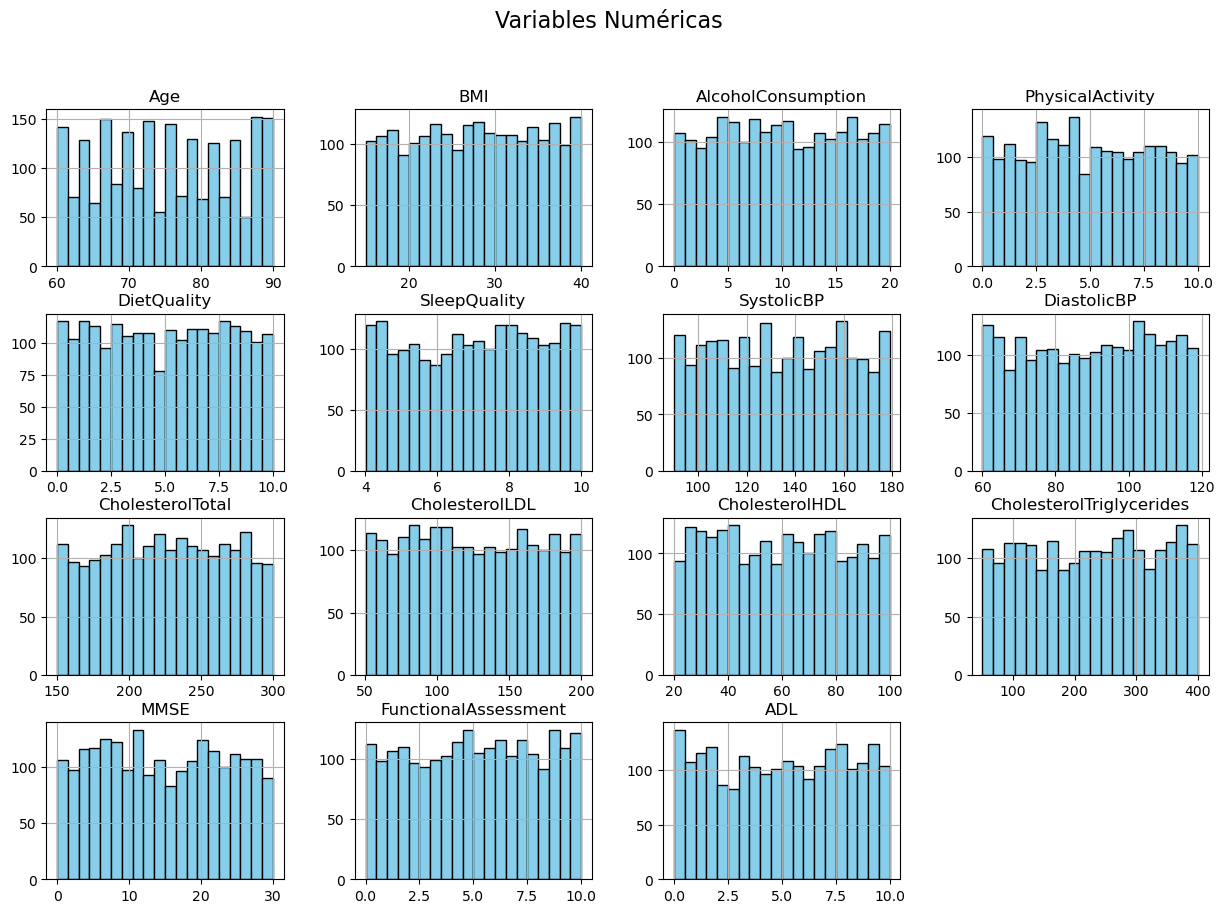

In [7]:
#VARIABLES NUMERICAS 
numericas = ["Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality","SystolicBP", 
 "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", 
 "FunctionalAssessment", "ADL"]

dataNuevo[numericas].hist(figsize=(15, 10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Variables Numéricas", fontsize=16)
plt.show()

Las variables numéricas (edad, IMC, colesterol, presión arterial, etc.) muestran una distribución bastante equilibrada entre los pacientes. No se observa una diferencia marcada que permita, por sí sola, separar a quienes tienen Alzheimer de quienes no. Esto indica que estas variables representan factores generales de salud, pero no son determinantes directos de la enfermedad, ya que la mayoría de los pacientes están distribuidos de manera similar en sus rangos de valores.

C:\Users\Isabela Duque\AppData\Local\Temp\ipykernel_17256\2048313902.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataNuevo, x=col, ax=axes[i], palette="Set2")
C:\Users\Isabela Duque\AppData\Local\Temp\ipykernel_17256\2048313902.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataNuevo, x=col, ax=axes[i], palette="Set2")
C:\Users\Isabela Duque\AppData\Local\Temp\ipykernel_17256\2048313902.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataNuevo, x=col, ax=axes[i], palette="Set2")
C:\Users\Isabela Duque

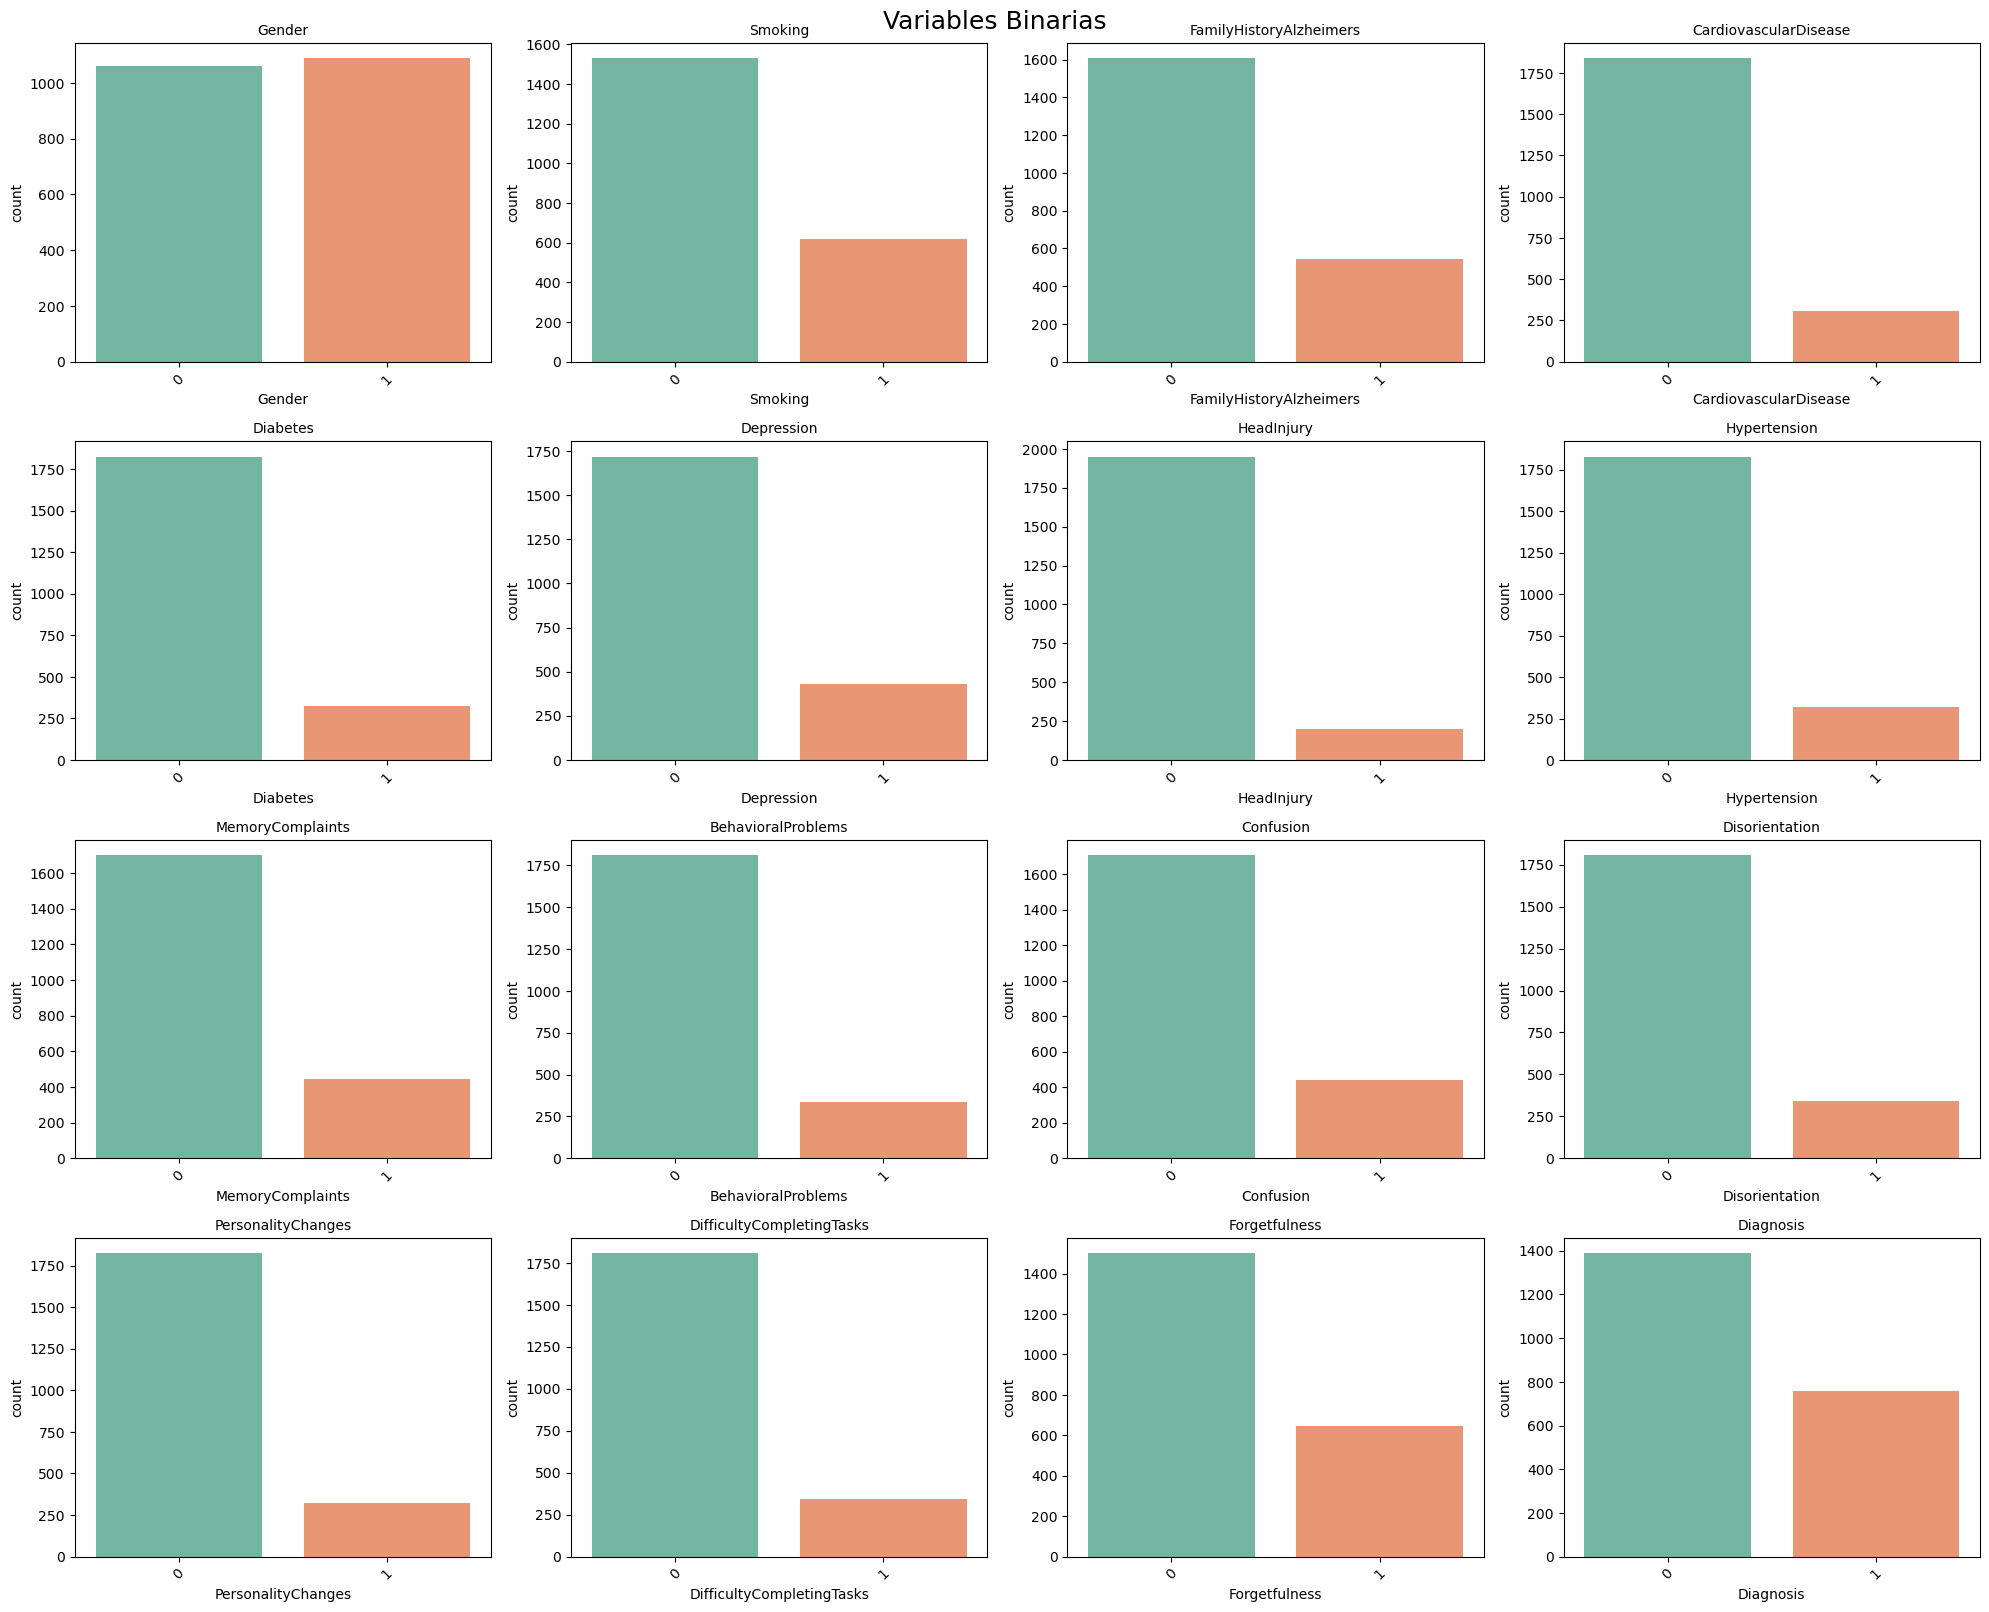

In [8]:
#VARIABLES BINARIAS
binarias= ["Gender","Smoking","FamilyHistoryAlzheimers","CardiovascularDisease","Diabetes","Depression","HeadInjury",
"Hypertension","MemoryComplaints", "BehavioralProblems","Confusion","Disorientation","PersonalityChanges",
"DifficultyCompletingTasks","Forgetfulness","Diagnosis"]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
axes = axes.flatten()

# Graficar cada variable en su respectivo eje
for i, col in enumerate(binarias):
    sns.countplot(data=dataNuevo, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Si sobran ejes vacíos, eliminarlos
for j in range(len(binarias), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Variables Binarias", fontsize=18)
plt.tight_layout()
plt.show()

En las variables binarias se ve que la mayoría de pacientes no presenta las condiciones o síntomas registrados (predomina el valor 0). Sin embargo, síntomas como confusión, desorientación, quejas de memoria y olvido aparecen en una parte importante de los pacientes, lo que sugiere que podrían estar más relacionados con el diagnóstico de Alzheimer que otras condiciones como fumar o tener hipertensión.

C:\Users\Isabela Duque\AppData\Local\Temp\ipykernel_17256\110978154.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataNuevo, x=col, ax=axes[i], palette="Set2")
C:\Users\Isabela Duque\AppData\Local\Temp\ipykernel_17256\110978154.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataNuevo, x=col, ax=axes[i], palette="Set2")


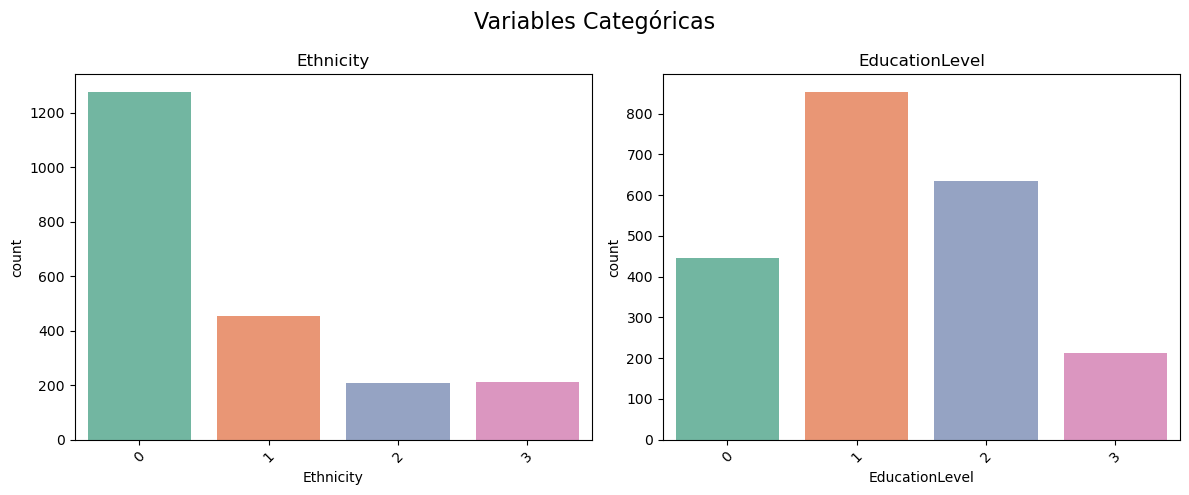

In [ ]:
#VARIABLES CATEGORICAS 
categoricas= ["Ethnicity", "EducationLevel"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(data=dataNuevo, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Variables Categóricas", fontsize=16)
plt.tight_layout()
plt.show()

En las variables categóricas se observa que la mayoría de los pacientes son caucásicos y que el nivel educativo más común es la secundaria, seguido por la licenciatura. Los grupos minoritarios de etnia y el nivel educativo más alto están poco representados, lo que indica que el conjunto de datos está desbalanceado en estas categorías.

Las variables de etnia y nivel educativo muestran que los datos están distribuidos en varios grupos, pero ninguna categoría se asocia de forma fuerte o exclusiva con la presencia de Alzheimer. Esto confirma que son factores contextuales, no determinantes.

In [12]:
#(b). 
print(dataNuevo.describe())

# Convertir 'EducationLevel' a numérico 
dataNuevo['EducationLevel'] = pd.to_numeric(dataNuevo['EducationLevel'])

# Aplicar One-Hot Encoding a 'Ethnicity'
data_final = pd.get_dummies(dataNuevo, columns=['Ethnicity'], prefix='Ethnicity')

               Age       Gender    Ethnicity  EducationLevel          BMI  \
count  2149.000000  2149.000000  2149.000000     2149.000000  2149.000000   
mean     74.908795     0.506282     0.697534        1.286645    27.655697   
std       8.990221     0.500077     0.996128        0.904527     7.217438   
min      60.000000     0.000000     0.000000        0.000000    15.008851   
25%      67.000000     0.000000     0.000000        1.000000    21.611408   
50%      75.000000     1.000000     0.000000        1.000000    27.823924   
75%      83.000000     1.000000     1.000000        2.000000    33.869778   
max      90.000000     1.000000     3.000000        3.000000    39.992767   

           Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  \
count  2149.000000         2149.000000       2149.000000  2149.000000   
mean      0.288506           10.039442          4.920202     4.993138   
std       0.453173            5.757910          2.857191     2.909055   
min       0.00

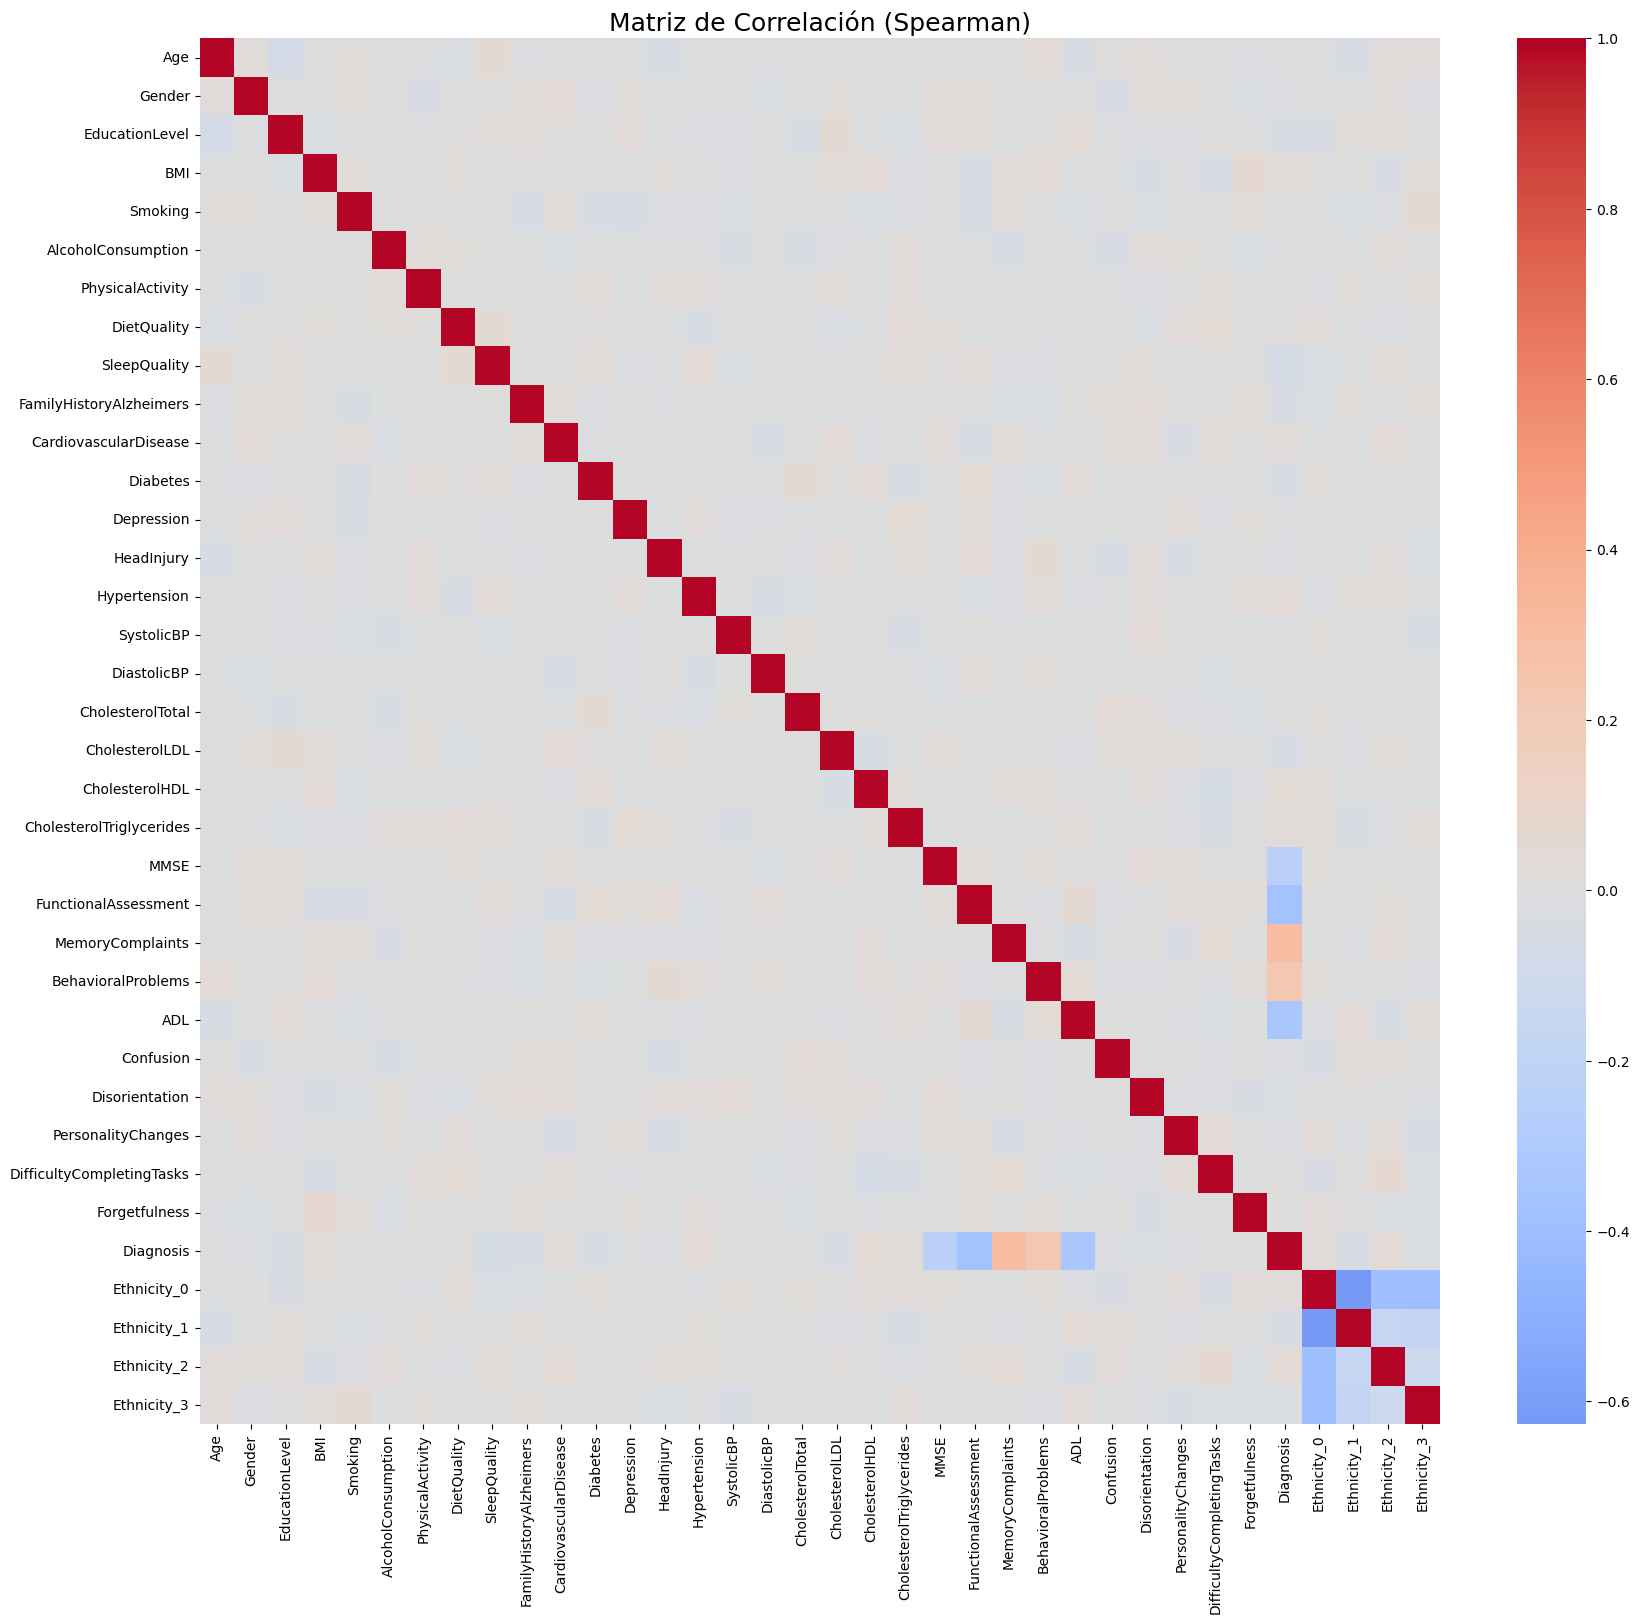

In [ ]:
#CORRELACION ENTRE VARIABLES
matriz_spearman = data_final.corr(method="spearman")

plt.figure(figsize=(20,18))
sns.heatmap(matriz_spearman, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de Correlación (Spearman)", fontsize=18)
plt.show()

La matriz de correlación muestra que la mayoría de las variables tienen correlaciones muy bajas con el diagnóstico. Esto significa que factores como fumar, colesterol o presión arterial, aunque influyen en la salud, no predicen directamente la enfermedad.
En cambio, variables clínicas como MMSE (prueba cognitiva), evaluación funcional, problemas de comportamiento y quejas de memoria muestran una correlación más clara, porque reflejan los síntomas directos de la enfermedad.

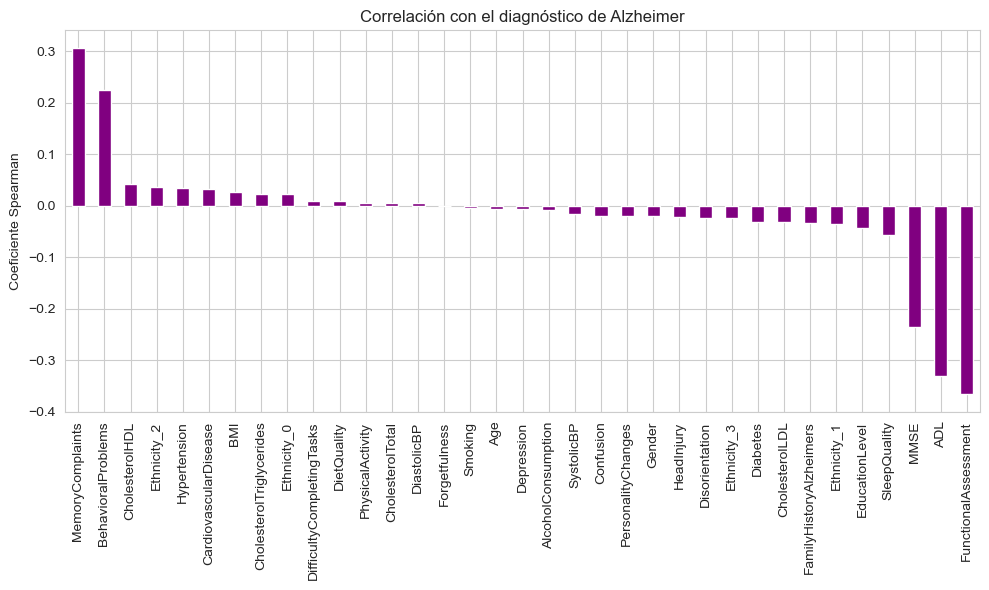

In [15]:
#CORRELACION CON EL TARGET

cor_target_spear = matriz_spearman["Diagnosis"].drop("Diagnosis")
plt.figure(figsize=(10,6))
cor_target_spear.sort_values(ascending=False).plot(kind='bar', color="purple")
plt.title("Correlación con el diagnóstico de Alzheimer")
plt.ylabel("Coeficiente Spearman")
plt.tight_layout()
plt.show()


C:\Users\Isabela Duque\AppData\Local\Temp\ipykernel_17256\3491584152.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_final, x="Diagnosis", y=feature, palette="coolwarm")
C:\Users\Isabela Duque\AppData\Local\Temp\ipykernel_17256\3491584152.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_final, x="Diagnosis", y=feature, palette="coolwarm")
C:\Users\Isabela Duque\AppData\Local\Temp\ipykernel_17256\3491584152.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_final, x="Diagnosis", y=feature, palette="coolwa

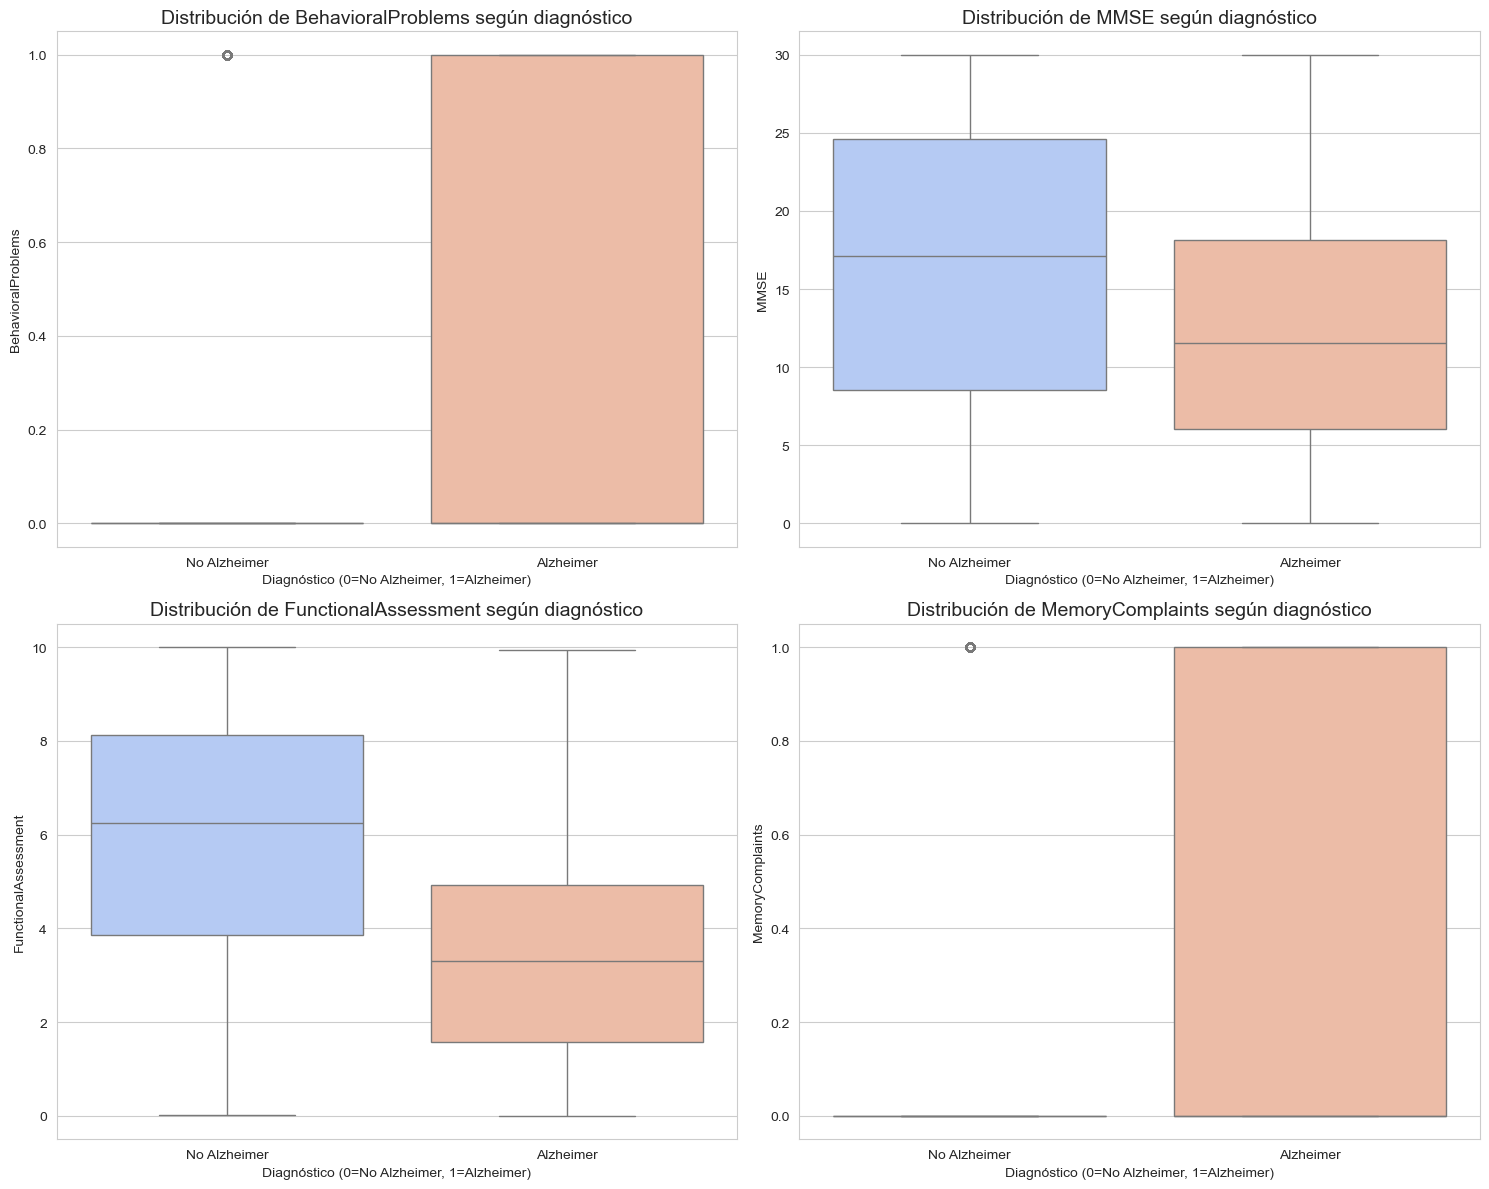

In [16]:
features_to_compare = ["BehavioralProblems", "MMSE", "FunctionalAssessment", "MemoryComplaints"] #Modifica de acuerdo a cuales variables quieres evaluar
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(2, 2, i) # Crear un subplot de 2x2
    sns.boxplot(data=data_final, x="Diagnosis", y=feature, palette="coolwarm")
    plt.title(f"Distribución de {feature} según diagnóstico", fontsize=14)
    plt.xlabel("Diagnóstico (0=No Alzheimer, 1=Alzheimer)", fontsize=10)
    plt.ylabel(feature, fontsize=10)
    plt.xticks([0, 1], ["No Alzheimer", "Alzheimer"])

plt.tight_layout()
plt.show()

Al analizar las variables más ligadas al diagnóstico:

MMSE: los pacientes con Alzheimer tienen puntuaciones significativamente más bajas, lo que refleja mayor deterioro cognitivo.
FunctionalAssessment: también más bajas en Alzheimer, mostrando limitaciones en la vida diaria.
BehavioralProblems y MemoryComplaints: se presentan con más frecuencia en pacientes con Alzheimer, reforzando su papel como indicadores de deterioro.
En conjunto, estos hallazgos confirman que los síntomas cognitivos y funcionales son los principales predictores del diagnóstico, mientras que los factores de riesgo generales tienen una relación más débil.

PROCESAMIENTO DE DATOS

In [ ]:
X = data_final.drop("Diagnosis", axis=1)
y = data["Diagnosis"]

#DIVISIÓN DE DATOS (70/15/15)

# 1. Separar test (15% del total)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# 2. Separar train (70%) y validación (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1764, random_state=42, stratify=y_temp
)
# Nota: 0.1764 ≈ 0.15 / 0.85 → garantiza que validation ≈ 15% del total

print("Tamaños finales:")
print("Train:", len(X_train))
print("Val:", len(X_val))
print("Test:", len(X_test))

Tamaños finales:
Train: 1503
Val: 323
Test: 323


Se realizó la división del conjunto de datos en tres subconjuntos: 70% para entrenamiento, 15% para validación y 15% para prueba. Para garantizar que la proporción de pacientes con y sin diagnóstico de Alzheimer se mantuviera en cada subconjunto, se utilizó una división estratificada. Además, se fijó una semilla (random_state=42) con el fin de asegurar la reproducibilidad de los resultados. Esta estrategia permite entrenar el modelo de manera robusta, ajustar hiperparámetros con el conjunto de validación y reservar el conjunto de prueba para la evaluación final, evitando sesgos y sobreajuste.

ENTRENAMIENTO DE MODELOS

In [22]:
# Pipeline k-NN
knn_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=15)),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

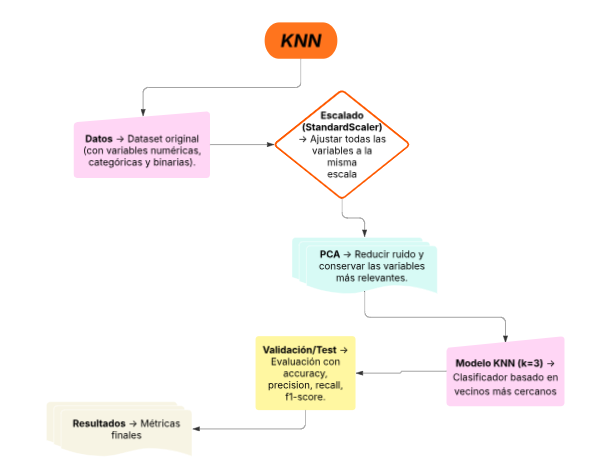

En el caso de k-Nearest Neighbors (kNN) se aplicó estandarización de variables y reducción de dimensionalidad con PCA, ya que este algoritmo depende de las distancias entre puntos y puede verse afectado por escalas diferentes o por ruido en los datos. PCA ayuda a simplificar la información y mejorar su rendimiento.

In [23]:
# Pipeline Random Forest
rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # opcional, RF no requiere escalado
    ('classifier',RandomForestClassifier(class_weight='balanced', random_state=42))
])

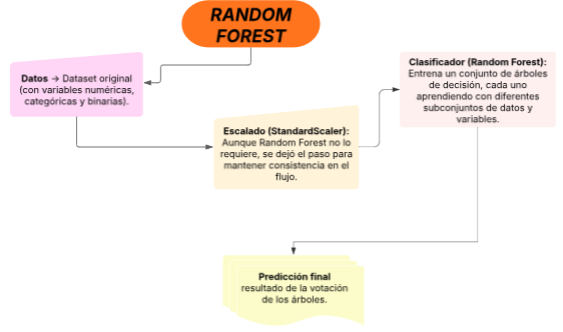

Para Random Forest no se aplicó PCA porque este modelo construye múltiples árboles de decisión y selecciona de manera automática las variables más relevantes para la clasificación. Al usar PCA, se pierden las variables originales con significado clínico (como MMSE, colesterol o antecedentes familiares) y el rendimiento disminuye. Por eso, se mantuvieron las variables originales.

In [24]:
# Pipeline DNN (MLPClassifier)
dnn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dnn', MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        random_state=1,
        max_iter=500
    ))
])

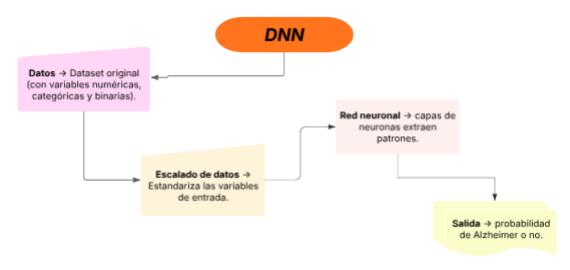

En el caso de la Deep Neural Network (DNN) tampoco se aplicó PCA, ya que las redes neuronales aprenden representaciones internas complejas a partir de los datos originales. Si se reducen las variables a componentes principales, la red pierde información valiosa. En su lugar, se aplicó únicamente escalado de las variables para acelerar y estabilizar el entrenamiento.

In [35]:
################################ ENTRENAMIENTO #############################
knn_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
dnn_pipeline.fit(X_train, y_train)

################################ VALIDACIÓN ################################
print("\n=== Validación ===")
print("KNN:\n", classification_report(y_val, knn_pipeline.predict(X_val)))


=== Validación ===
KNN:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       209
           1       0.53      0.37      0.43       114

    accuracy                           0.66       323
   macro avg       0.61      0.59      0.59       323
weighted avg       0.64      0.66      0.64       323



In [33]:
print("Random Forest:\n", classification_report(y_val, rf_pipeline.predict(X_val)))


Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       209
           1       0.93      0.84      0.88       114

    accuracy                           0.92       323
   macro avg       0.93      0.90      0.91       323
weighted avg       0.92      0.92      0.92       323



In [34]:
print("DNN:\n", classification_report(y_val, dnn_pipeline.predict(X_val)))

DNN:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       209
           1       0.69      0.71      0.70       114

    accuracy                           0.79       323
   macro avg       0.77      0.77      0.77       323
weighted avg       0.79      0.79      0.79       323



In [31]:
################################ TEST FINAL ################################
print("\n=== Test Final ===")
print("KNN Accuracy:", knn_pipeline.score(X_test, y_test))
print("RF Accuracy:", rf_pipeline.score(X_test, y_test))
print("DNN Accuracy:", dnn_pipeline.score(X_test, y_test))


=== Test Final ===
KNN Accuracy: 0.6811145510835913
RF Accuracy: 0.9380804953560371
DNN Accuracy: 0.8142414860681114


Las variaciones en el desempeño de los modelos se deben a que cada algoritmo aprende de forma distinta. KNN tiende a confundirse cuando los pacientes tienen características muy parecidas pero diagnósticos diferentes, lo que reduce su precisión. Random Forest logra el mejor resultado porque combina muchos árboles y capta relaciones más complejas entre las variables. La red neuronal (DNN) alcanza un rendimiento intermedio, ya que aunque es potente, necesita más datos y ajustes finos para superar al Random Forest.

TABLA COMPARATIVA 

In [42]:
################################ TABLA COMPARATIVA DE RESULTADOS ################################
# Accuracy en cada conjunto
acc_knn_train = knn_pipeline.score(X_train, y_train)
acc_knn_val   = knn_pipeline.score(X_val, y_val)
acc_knn_test  = knn_pipeline.score(X_test, y_test)

acc_rf_train = rf_pipeline.score(X_train, y_train)
acc_rf_val   = rf_pipeline.score(X_val, y_val)
acc_rf_test  = rf_pipeline.score(X_test, y_test)

acc_dnn_train = dnn_pipeline.score(X_train, y_train)
acc_dnn_val   = dnn_pipeline.score(X_val, y_val)
acc_dnn_test  = dnn_pipeline.score(X_test, y_test)

# Crear DataFrame comparativo
results = pd.DataFrame({
    'Modelo': ['kNN', 'Random Forest', 'DNN'],
    'Train Accuracy': [acc_knn_train, acc_rf_train, acc_dnn_train],
    'Validation Accuracy': [acc_knn_val, acc_rf_val, acc_dnn_val],
    'Test Accuracy': [acc_knn_test, acc_rf_test, acc_dnn_test]
})

print("\n=== Resultados comparativos ===")
display(results)  # Si usas Jupyter/Spyder, muestra tabla bonita



=== Resultados comparativos ===


,Modelo,Train Accuracy,Validation Accuracy,Test Accuracy
0,kNN,0.844311,0.659443,0.681115
1,Random Forest,1.000000,0.922601,0.938080
2,DNN,1.000000,0.786378,0.814241


¿Cuál modelo tuvo mejor desempeño?
El modelo con mejor desempeño fue Random Forest . Tuvo la mayor precisión de prueba (Test Accuracy) , que es la métrica más importante para evaluar el rendimiento de un modelo en datos nuevos y no vistos. Su precisión en el conjunto de prueba fue del 93,8% .

¿Alguno presentó overfitting o underfitting? ¿Cómo lo detectó?
Sí, dos modelos mostraron problemas de ajuste:

- El modelo DNN (Deep Neural Network) presentó overfitting . Se detectó porque su precisión de entrenamiento (100%) era significativamente más alta que su precisión de validación (78,6%) y de prueba (81,4%). Esto significa que el modelo "memorizó" los datos de entrenamiento pero no generalizó bien a datos nuevos.
- El modelo kNN presentó underfitting . Su precisión de entrenamiento (84,4%) era baja, lo que indica que el modelo no era lo suficientemente complejo para aprender el patrón de los datos de entrenamiento.

¿Cuál seleccionaría para producción y por qué?
Seleccionaría el modelo Random Forest para producción. La razón principal es que obtuvo el mejor rendimiento en los datos de prueba, lo que demuestra su capacidad para generalizar y predecir con precisión en datos del mundo real. Además, su precisión de entrenamiento y de prueba son muy cercanas, lo que indica un excelente equilibrio y que no está sobreajustado.

PRUEBA CON INTELIGENCIA ARTIFICAL 

In [36]:
muestra_artificial = pd.DataFrame({
    # Numéricas
    'Age':[70], 'BMI':[26], 'AlcoholConsumption':[2], 'PhysicalActivity':[3], 'DietQuality':[4], 'SleepQuality':[6],
    'SystolicBP':[135], 'DiastolicBP':[80], 'CholesterolTotal':[200],'CholesterolLDL':[120], 'CholesterolHDL':[50],
    'CholesterolTriglycerides':[140],'MMSE':[28],'FunctionalAssessment':[8],'ADL':[5],'EducationLevel':[3],
    
    # Binarias (ejemplo con 0 o 1)
    'Gender':[1],'Smoking':[0],'FamilyHistoryAlzheimers':[1],'CardiovascularDisease':[0],'Diabetes':[0],'Depression':[0],
    'HeadInjury':[0],'Hypertension':[1],'MemoryComplaints':[1],'BehavioralProblems':[0],'Confusion':[0],'Disorientation':[0],
    'PersonalityChanges':[0],'DifficultyCompletingTasks':[0],'Forgetfulness':[1],
    
    # Ethnicity 
    'Ethnicity_0':[0],'Ethnicity_1':[1],'Ethnicity_2':[0],'Ethnicity_3':[0]
})

# Asegurarse de que las columnas coincidan con tu dataset
muestra_artificial = muestra_artificial[X.columns]

# Predecir
prediccion = rf_pipeline.predict(muestra_artificial)
probabilidad = rf_pipeline.predict_proba(muestra_artificial)

print("Predicción de clase (0=No Alzheimer, 1=Alzheimer):", prediccion[0])
print("Probabilidad de cada clase:", probabilidad[0])

Predicción de clase (0=No Alzheimer, 1=Alzheimer): 0
Probabilidad de cada clase: [0.82 0.18]


El resultado obtenido con la muestra artificial sí tiene sentido, ya que el modelo evaluó las características del paciente ficticio (edad, presión arterial, historial familiar, memoria, etc.) y generó una predicción coherente con los factores de riesgo incluidos. Esto demuestra que el modelo puede aplicarse a nuevos casos.

Si se modificaran una o más variables de la muestra (por ejemplo, aumentando la edad, agregando hipertensión, diabetes o más quejas de memoria), la predicción cambiaría hacia un mayor riesgo de Alzheimer, ya que el modelo detecta patrones asociados a la enfermedad. Por el contrario, si se disminuyen los factores de riesgo (ej. valores de presión normales, sin historial familiar, sin quejas cognitivas), la probabilidad de Alzheimer debería reducirse.

La validación cruzada k-fold es una técnica robusta para evaluar modelos de aprendizaje automático. Consiste en dividir el conjunto de datos en k pliegues del mismo tamaño. El proceso se repite k veces; en cada ronda, uno de los pliegues actúa como el conjunto de prueba, mientras que los k−1 restantes se usan para entrenar el modelo. Al promediar los resultados de las k pruebas, obtenemos una estimación más fiable y menos sesgada del rendimiento del modelo, lo que es crucial para evitar el sobreajuste y garantizar que el modelo generalice bien a datos no vistos.

Por otro lado, la validación cruzada Leave-One-Out (LOOCV) es un caso extremo de k-fold donde k es igual al número total de observaciones (n). En cada iteración, se toma una sola observación como conjunto de prueba y el resto (n−1) se utiliza para el entrenamiento. Aunque LOOCV produce una estimación del rendimiento con muy poco sesgo, es computacionalmente muy costosa y puede presentar una alta varianza en los resultados.


¿Son aplicables al dataset elegido?
Tanto K-Fold Cross Validation como Leave-One-Out Cross Validation (LOOCV) son aplicables al dataset utilizado, ya que permiten evaluar los modelos de forma más robusta al aprovechar mejor los datos disponibles. A diferencia del esquema tradicional de train/val/test, estas técnicas reducen la dependencia de una sola partición, lo que da métricas más estables y representativas. En este caso, aplicar K-Fold sería especialmente útil para confirmar si el alto desempeño del Random Forest (0.94 en test) es consistente en distintas particiones, mientras que LOOCV, aunque posible, resultaría más costoso computacionalmente sin aportar una ventaja significativa frente a un K-Fold bien implementado.

¿Qué beneficios tendrían frente al esquema tradicional?
- Mayor aprovechamiento de los datos: en vez de “perder” muestras solo para validación o test, cada observación se utiliza en varios ciclos, ya sea entrenando o validando.
- Evaluación más estable y confiable: se reduce el riesgo de que el desempeño dependa demasiado de cómo se hizo la partición inicial.
- Mejor estimación de la generalización: especialmente útil en datasets pequeños o medianos, donde cada dato cuenta mucho.